<a href="https://colab.research.google.com/github/Sarthak82/Market-Basket-Analysis/blob/main/Copy_of_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=76bf93f11daef8563ae22dc951cd68841e4e0b4363f246f73e775ac5509bfbf6
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
df=pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df['date']=pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


<ipython-input-75-8af01a1b4b58>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date']=pd.to_datetime(df["Date"])


In [ ]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-05-01
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-01-02


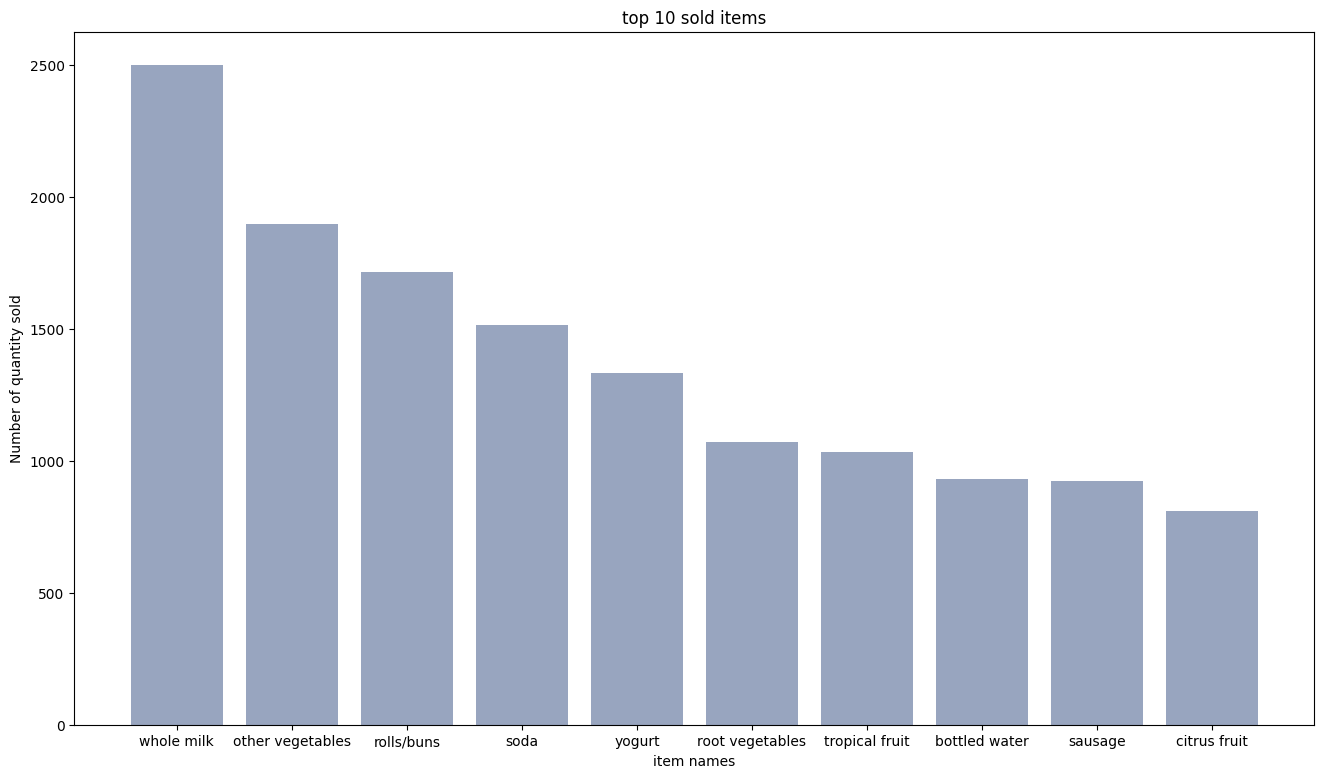

In [ ]:
item_distr=df.groupby(by="itemDescription").size().reset_index(name="frequency").sort_values(by="frequency",ascending=False).head(10)

bars=item_distr["itemDescription"]
height=item_distr["frequency"]
x_pos=np.arange(len(bars))

plt.figure(figsize=(16,9))
plt.bar(x_pos,height,color=(0.2,0.3,0.5,0.5))
plt.title("top 10 sold items")
plt.xlabel("item names")
plt.ylabel("Number of quantity sold")

plt.xticks(x_pos,bars)

plt.show()

In [ ]:
df_date=df.set_index((['Date']))
df_date.head()

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-05-01
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-01-02


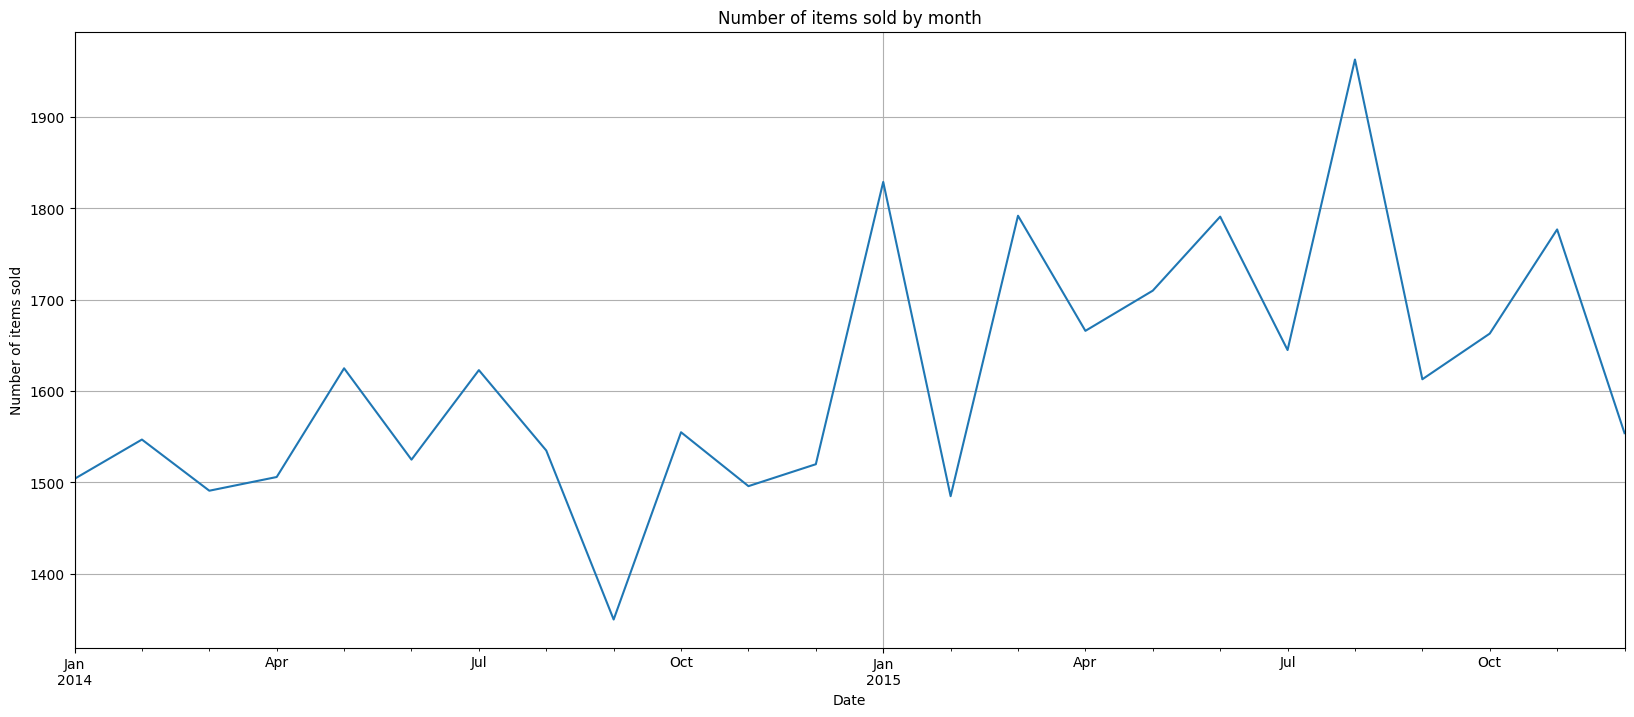

In [ ]:
df_date['Date'] = pd.to_datetime(df_date['date'])
df_date.set_index('date', inplace=True)
df_date.resample("M")['itemDescription'].count().plot(figsize=(20, 8), grid=True, title="Number of items sold by month")
plt.xlabel("Date")
plt.ylabel("Number of items sold")
plt.show()


In [ ]:
cust_level=df[["Member_number","itemDescription"]].sort_values(by="Member_number",ascending=False)
cust_level["itemDescription"]=cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [ ]:
transactions=[a[1]['itemDescription'].tolist() for a in list(cust_level.groupby("Member_number"))]
transactions

[['misc. beverages',
  'sausage',
  'soda',
  'yogurt',
  'salty snack',
  'pastry',
  'canned beer',
  'hygiene articles',
  'whole milk',
  'pickled vegetables',
  'sausage',
  'semi-finished bread',
  'whole milk'],
 ['beef',
  'sausage',
  'frankfurter',
  'soda',
  'whipped/sour cream',
  'frankfurter',
  'rolls/buns',
  'soda',
  'white bread',
  'whole milk',
  'whole milk',
  'curd'],
 ['specialty chocolate',
  'butter',
  'whole milk',
  'butter milk',
  'tropical fruit',
  'sugar',
  'other vegetables',
  'frozen vegetables'],
 ['dental care',
  'rolls/buns',
  'rolls/buns',
  'frozen meals',
  'rolls/buns',
  'sausage',
  'detergent',
  'root vegetables'],
 ['frozen fish',
  'shopping bags',
  'hygiene articles',
  'rolls/buns',
  'whole milk',
  'canned beer',
  'root vegetables',
  'tropical fruit',
  'whole milk',
  'chocolate',
  'other vegetables',
  'red/blush wine',
  'pastry',
  'rolls/buns',
  'packaged fruit/vegetables',
  'dish cleaner',
  'pip fruit',
  'other ve

In [ ]:
from apyori import apriori
rules=apriori(transactions=transactions,min_support=0.002,min_confidence=0.05,min_lift=3,min_length=2)
result=list(rules)

In [ ]:
result

In [ ]:
def inspects(result):
    lhs=[tuple(results[2][0][0]) [0] for results in result]
    rhs=[tuple(results[2][0][1]) [0] for results in result]
    supports=[results[1] for results in result ]
    confidence=[results[2][0][2] for results in result]
    lifts=[results[2][0][3] for results in result]
    return list(zip(lhs,rhs,supports,confidence,lifts))

resultsdataframe=pd.DataFrame(inspects(result),columns=['Left Hand Side','Right Hand Side', 'Support', 'Confidences','Lifts'])


In [ ]:
resultsdataframe.nlargest(n=10,columns='Lifts')

,Left Hand Side,Right Hand Side,Support,Confidences,Lifts
4915,bottled water,pork,0.002052,0.105263,14.654135
4914,bottled water,pork,0.002052,0.105263,12.068111
2674,oil,pork,0.002052,0.242424,11.524021
3573,brown bread,soda,0.002052,0.073394,11.443670
4133,long life bakery product,whole milk,0.002052,0.148148,11.105413
3290,bottled water,sausage,0.002052,0.150943,10.322410
2904,brown bread,misc. beverages,0.002309,0.097826,9.533152
5045,bottled water,whole milk,0.002052,0.135593,9.438257
2902,brown bread,domestic eggs,0.002052,0.086957,9.415459
2734,bottled water,brown bread,0.002309,0.118421,9.232105
